In [24]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as ticker
import warnings


In [25]:
data = yf.download("SE NKE CHWY", start="2020-07-28", end="2020-12-28")
close = data['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [26]:
def plot_stocks(data, plot = 'Close', figsize=(14, 6), scaled = False):
    stocks = data[plot]
    title = 'Stock Prices'
    if scaled:
        pd.options.mode.chained_assignment = None  # default='warn'
        for stock in stocks.columns:
            stocks[stock] = stocks[stock].apply(lambda x: x - stocks[stock][0])
        title = 'Scaled Stock Prices'

        
    stocks.plot(figsize = figsize, title = title)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
    

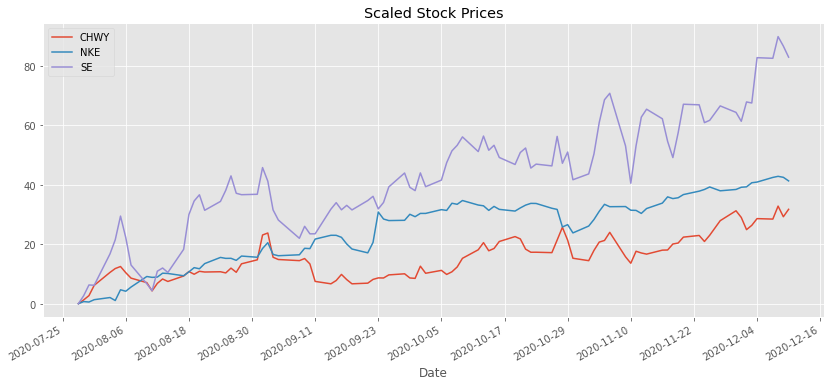

In [27]:
plot_stocks(data, scaled=True)

In [28]:
def who_is_winning(stocks, show_details = False):
    peeps = ['Mom', 'Steven', 'Al']
    stock_dict = {(peep, stock): round((stocks[stock][-1] - stocks[stock][0]) / stocks[stock][0]  * 100, 2) for peep, stock in list(zip(peeps, stocks.columns))}
    total = 0
    for person, percent in stock_dict.items():
        if percent > total:
            total = percent
            winner = person[0]
            stock = person[1]
            
    if show_details:
        
        print(f'Start Date: {close.index[0]}')
        print(f'Today is {close.index[-1]}\n')
        [print(f'{stock}: Started at ${round(stocks[stock][0], 2)} and today is at ${round(stocks[stock][-1], 2)}. That\'s a {round((stocks[stock][-1] - stocks[stock][0]) / stocks[stock][0]  * 100, 2)}% increase.') for stock in stocks.columns]
    
    
    print(f'\n{winner}\'s stock pick, {stock}, is winning with a {total}% gain. Good job, {winner}!\n')

who_is_winning(close, show_details=False)



Al's stock pick, SE, is winning with a 71.51% gain. Good job, Al!



In [29]:
who_is_winning(close, show_details=True)

Start Date: 2020-07-28 00:00:00
Today is 2020-12-10 00:00:00

CHWY: Started at $46.32 and today is at $78.07. That's a 68.54% increase.
NKE: Started at $95.86 and today is at $137.58. That's a 43.52% increase.
SE: Started at $116.0 and today is at $198.95. That's a 71.51% increase.

Al's stock pick, SE, is winning with a 71.51% gain. Good job, Al!

